In [1]:
# given the following input data format:
# lat,lon,count
# Where count is the number of metorites that fell in that location
# And lat and lon are the latitude and longitude at the center of the grid cell
# the grid cell size is determined by the size of the data set (binning)
import matplotlib.pyplot as plt
import pandas as pd
# import train test split
from sklearn.model_selection import train_test_split
# import models for predicting count
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# import nueral networks
from sklearn.neural_network import MLPRegressor
# import KNN
from sklearn.neighbors import KNeighborsRegressor

# iimport metrics to score models
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import and split data "../../data/USA_meteorite_data_binned_bins10.csv"
# header is the first row of the data
# read in bins range(10:390:10)
bins = range(10, 990, 10)
input_data = {}
for bin in bins:
    input_data[bin] = pd.read_csv("../../data/USA_meteorite_data_binned_bins" + str(bin) + ".csv", header=0)

# split data into training and testing sets
# test size is 20% of the data
# random state is set to 42 for reproducibility
train_test_data = {}
for bin in bins:
    train_test_data[bin] = train_test_split(input_data[bin], test_size=0.2, random_state=42)

# create a dictionary of models
models = {}
models['Linear Regression'] = LinearRegression()
models['Decision Tree'] = DecisionTreeRegressor()
models['Random Forest'] = RandomForestRegressor()
models['MLP'] = MLPRegressor()
models['KNN'] = KNeighborsRegressor()

c:\Users\jivey\devel\Metorite_Data_Mine\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jivey\devel\Metorite_Data_Mine\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jivey\devel\Metorite_Data_Mine\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


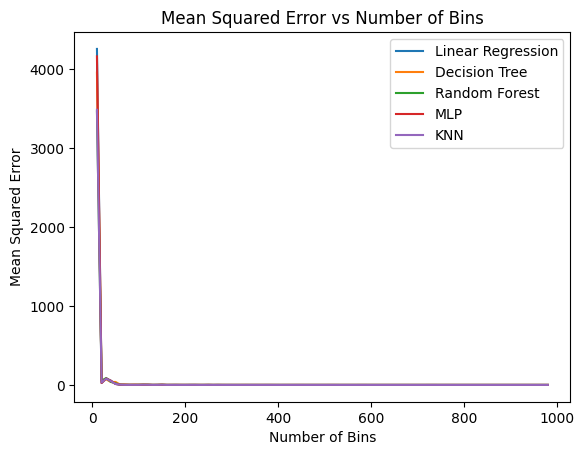

In [3]:
# score and graph results as a line where x is the number of bins and y is the mse
# for each model
for name, model in models.items():
    # create a dictionary to store the results
    results = {}
    for bin in bins:
        # train the model
        model.fit(train_test_data[bin][0][['lat', 'lon']], train_test_data[bin][0]['count'])
        # predict the count
        predictions = model.predict(train_test_data[bin][1][['lat', 'lon']])
        # score the model
        results[bin] = mean_squared_error(train_test_data[bin][1]['count'], predictions)
    # plot the results
    plt.plot(results.keys(), results.values(), label=name)
    plt.xlabel('Number of Bins')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error vs Number of Bins')
    plt.legend()

In [4]:
# plot the r2 score for each model and bin size where
# x is the number of bins and y is the r2 score

for name, model in models.items():
    # create a dictionary to store the results
    results = {}
    for bin in bins:
        # train the model
        model.fit(train_test_data[bin][0][['lat', 'lon']], train_test_data[bin][0]['count'])
        # predict the count
        predictions = model.predict(train_test_data[bin][1][['lat', 'lon']])
        # score the model
        results[bin] = r2_score(train_test_data[bin][1]['count'], predictions)
    # plot the results
    plt.plot(results.keys(), results.values(), label=name)
    plt.xlabel('Number of Bins')
    plt.ylabel('R2 Score')
    plt.title('R2 Score vs Number of Bins')
    plt.legend()

c:\Users\jivey\devel\Metorite_Data_Mine\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


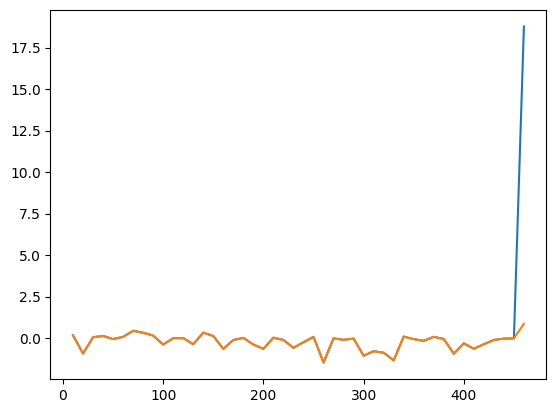

In [ ]:
# now we will run on 1 more pre processed data set
# "../../data/USA_meteorite_data_binned_bins30_blurred.csv"
# header is the first row of the data

df = pd.read_csv("../../data/USA_meteorite_data_binned_bins30_blurred.csv", header=0)
# split data into training and testing sets
# test size is 20% of the data
# random state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df[['lat', 'lon']], df['count'], test_size=0.2, random_state=42)

# create a dictionary of models
models = {}
models['Linear Regression'] = LinearRegression()
models['Decision Tree'] = DecisionTreeRegressor()
models['Random Forest'] = RandomForestRegressor()
models['MLP'] = MLPRegressor()
models['KNN'] = KNeighborsRegressor()

# score and graph results as a line where x is the number of bins and y is the mse
# for each model
for name, model in models.items():
    # train the model
    model.fit(X_train, y_train)
    # predict the count
    predictions = model.predict(X_test)
    # score the model
    results[bin] = mean_squared_error(y_test, predictions)
# plot the results
plt.plot(results.keys(), results.values(), label=name)

# plot the r2 score for each model and bin size where
# x is the number of bins and y is the r2 score
for name, model in models.items():
    # train the model
    model.fit(X_train, y_train)
    # predict the count
    predictions = model.predict(X_test)
    # score the model
    results[bin] = r2_score(y_test, predictions)
# plot the results
plt.plot(results.keys(), results.values(), label=name)